In [ ]:
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt


### 1. Carga del dataset y organizacion de los datos

In [ ]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv("epidata.csv")


# Mostramos las columnas originales del dataset para asegurar que se han cargado correctamente
print("Columnas originales:", df.columns.tolist())

#Reclasificar  la columna 1 como individuo
df.rename(columns={'Unnamed': 'individuo'}, inplace=True)

# Renombramos la columna objetivo para claridad
df.rename(columns={'y': 'label'}, inplace=True)

# Binarizacion de las clases:  1 = epileptic seizure, 0 = no seizure (clases 2,3,4 y 5)
df['epilepsy_binary'] = df['label'].apply(lambda x: 1 if x == 1 else 0)

# Mostrar primeras filas del dataset para verificar los cambios
print("\nPrimeras filas del DataFrame organizado:")
print(df.head().to_string())



NameError: name 'pd' is not defined

### 2. Analisis exploratorio de datos

#### 2.1 Resumen estadistico general de las variables numerica

In [56]:
print("La descripcion estadistica de las variables numericas son las siguientes:")
df.describe() 

La descripcion estadistica de las variables numericas son las siguientes:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,label,epilepsy_binary
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1.000000


#### 2.2 Observacion de correlacion de variales

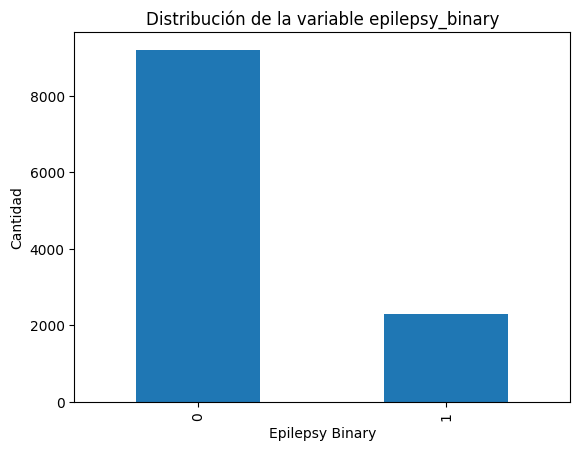

In [57]:
df['epilepsy_binary'].value_counts().plot(kind='bar')
plt.xlabel('Epilepsy Binary')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable epilepsy_binary')
plt.show()

#### 2.3 Tendencia de la señal de varios sujetos con epilepsia

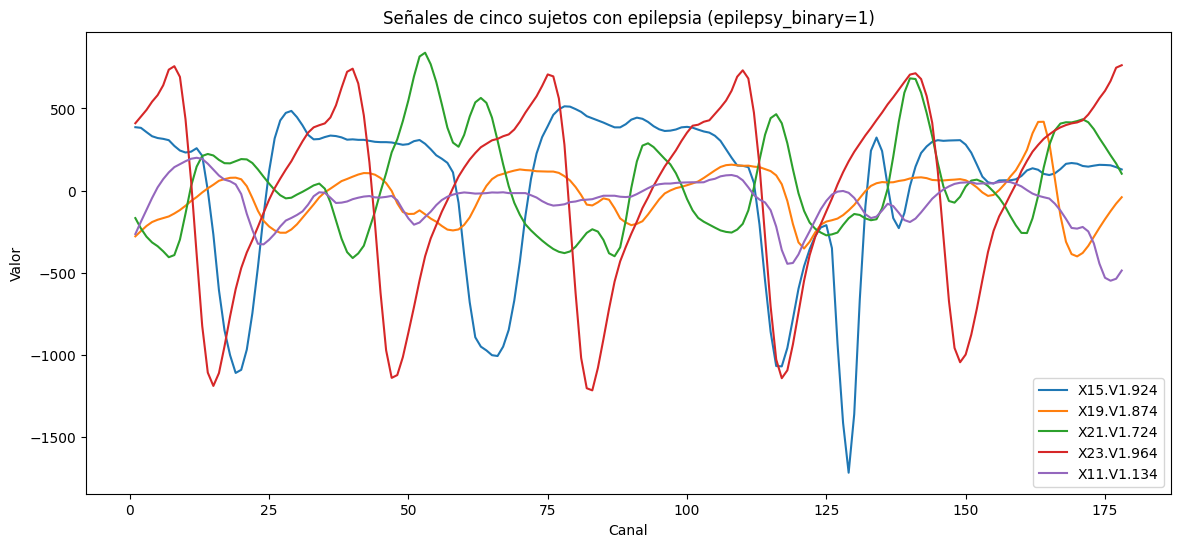

In [58]:
# Seleccionar cinco sujetos con epilepsy_binary=1
positivos = df[df['epilepsy_binary'] == 1].head(5)

# Graficar las señales de los cinco sujetos
plt.figure(figsize=(14, 6))
for idx, row in positivos.iterrows():
    plt.plot(range(1, 179), row.loc['X1':'X178'], label=row['individuo'])

plt.xlabel('Canal')
plt.ylabel('Valor')
plt.title('Señales de cinco sujetos con epilepsia (epilepsy_binary=1)')
plt.legend()
plt.show()

#### 2.4 Tendencia de la señal de varios sujetos sin epilepsia

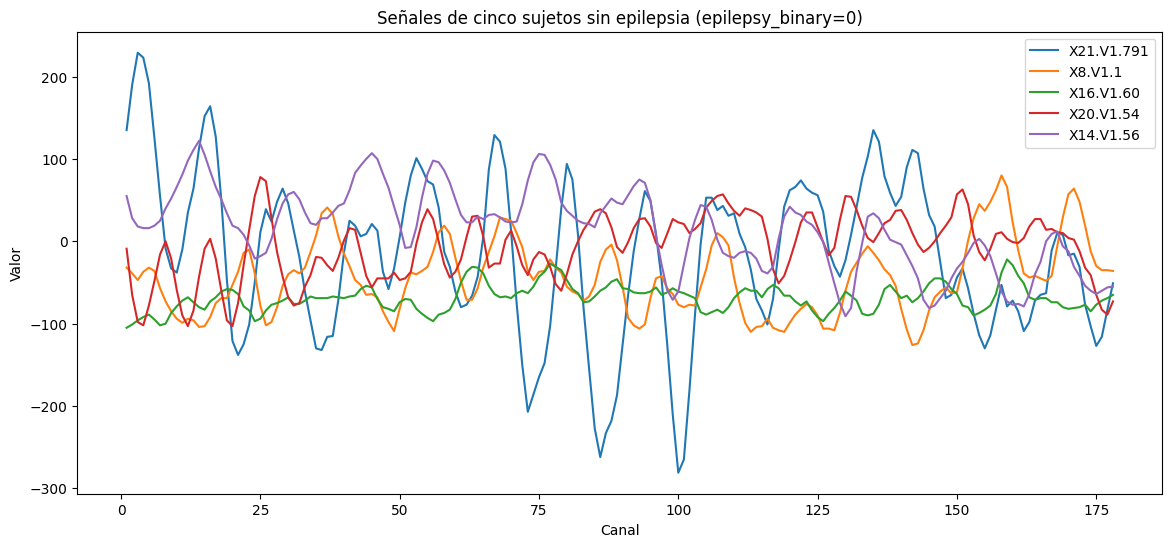

In [59]:
# Seleccionar cinco sujetos con epilepsy_binary=0
negativos = df[df['epilepsy_binary'] == 0].head(5)

# Graficar las señales de los cinco sujetos sin epilepsia
plt.figure(figsize=(14, 6))
for idx, row in negativos.iterrows():
    plt.plot(range(1, 179), row.loc['X1':'X178'], label=row['individuo'])

plt.xlabel('Canal')
plt.ylabel('Valor')
plt.title('Señales de cinco sujetos sin epilepsia (epilepsy_binary=0)')
plt.legend()
plt.show()

#### 2.5 Tendencia general de personas con y sin epilepsia

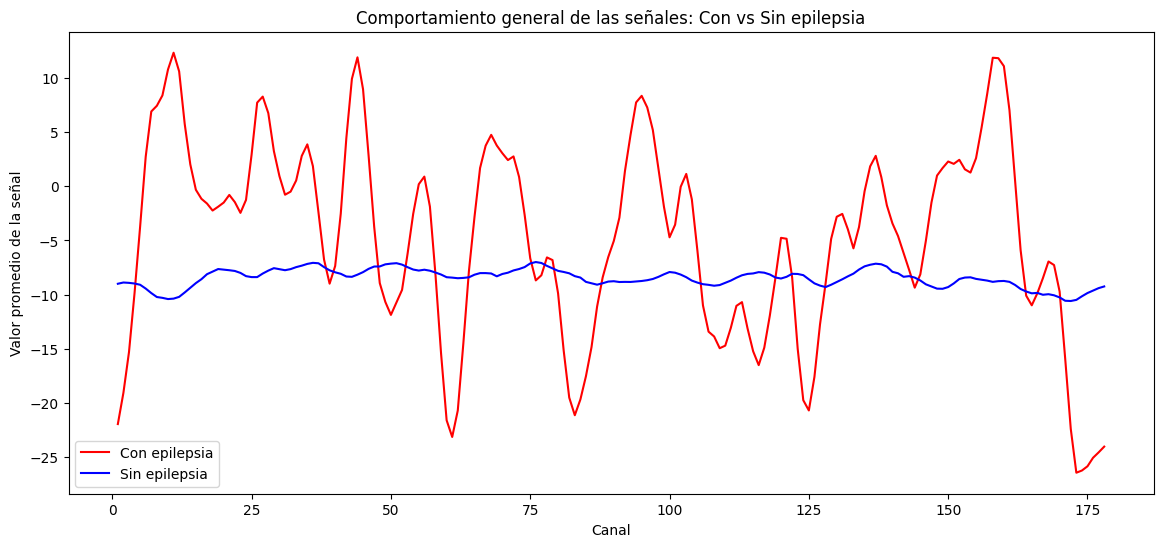

In [62]:
# Calcular la media de las señales para cada grupo
media_epilepsia = df[df['epilepsy_binary'] == 1].loc[:, 'X1':'X178'].mean()
media_no_epilepsia = df[df['epilepsy_binary'] == 0].loc[:, 'X1':'X178'].mean()

plt.figure(figsize=(14, 6))
plt.plot(range(1, 179), media_epilepsia, label='Con epilepsia', color='red')
plt.plot(range(1, 179), media_no_epilepsia, label='Sin epilepsia', color='blue')
plt.xlabel('Canal')
plt.ylabel('Valor promedio de la señal')
plt.title('Comportamiento general de las señales: Con vs Sin epilepsia')
plt.legend()
plt.show()